# Data analyst agent: get your data's insights in the blink of an eye ✨
_Authored by: [Aymeric Roucher](https://huggingface.co/m-ric)_

> This tutorial is advanced. You should have notions from [this other cookbook](agents) first!

In this notebook we will make a **data analyst agent: a Code agent armed with data analysis libraries, that can load and transform dataframes to extract insights from your data, and even plots the results!**

Let's say I want to analyze the data from the [Kaggle Titanic challenge](https://www.kaggle.com/competitions/titanic) in order to predict the survival of individual passengers. But before digging into this myself, I want an autonomous agent to prepare the analysis for me by extracting trends and plotting some figures to find insights.

Let's set up this system. 

Run the line below to install required dependancies:

In [1]:
!pip install seaborn "transformers[agents]"

We first create the agent. We used a `ReactCodeAgent` (read the [documentation](https://huggingface.co/docs/transformers/en/agents) to learn more about types of agents), so we do not even need to give it any tools: it can directly run its code.

We simply make sure to let it use data science-related libraries by passing these in `additional_authorized_imports`: `["numpy", "pandas", "matplotlib.pyplot", "seaborn"]`.

In general when passing libraries in `additional_authorized_imports`, make sure they are installed on your local environment, since the python interpreter can only use libraries installed on your environment.

⚙ Our agent will be powered by [meta-llama/Meta-Llama-3-70B-Instruct](meta-llama/Meta-Llama-3-70B-Instruct) using `HfEngine` class that uses HF's Inference API: the Inference API allows to quickly and easily run any OS model.

In [4]:
from transformers.agents import HfEngine, ReactCodeAgent
from huggingface_hub import login
import os

login(os.getenv("HUGGINGFACEHUB_API_TOKEN"))

llm_engine = HfEngine("meta-llama/Meta-Llama-3-70B-Instruct")

agent = ReactCodeAgent(
    tools=[],
    llm_engine=llm_engine,
    additional_authorized_imports=["numpy", "pandas", "matplotlib.pyplot", "seaborn"],
    max_iterations=10,
)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/aymeric/.cache/huggingface/token
Login successful


## Data analysis

Upon running the agent, we provide it with additional notes directly taken from the competition, and give these as a kwarg to the `run` method:

======== New task ========
You are an expert data analyst.
Please load the source file and analyze its content.
According to the variables you have, begin by listing 3 interesting questions that could be asked on this data, for instance about specific correlations with survival rate.
Then answer these questions one by one, by finding the relevant numbers.
Meanwhile, plot some figures using matplotlib/seaborn and save them to the (already existing) folder './figures/': take care to clear each figure with plt.clf() before doing another plot.

In your final answer: summarize these correlations and trends
After each number derive real worlds insights, for instance: "Correlation between is_december and boredness is 1.3453, which suggest people are more bored in winter".
Your final answer should have at least 3 numbered and detailed parts.

You have been provided with these initial arguments: {'additional_notes': '\n### Variable Notes\npclass: A proxy for socio-economic status (SES)\n1st = U

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

Print outputs:

==== Agent is executing the code below:
# Calculate correlation between Pclass and Survived
pclass_corr = df[['Pclass', 'Survived']].corr()['Pclass']['Survived']
print("Correlation between Pclass and Survived:", pclass_corr)

# Calculate correlation between Age and Survived
age_corr = df[['Age', 'Survived']].corr()['Age']['Survived']
print("Correlation between Age and Survived:", age_corr)

# Calculate correlation between Family Size and Survived
family_size_corr = df[['FamilySize', 'Survived']].corr()['FamilySize']['Survived']
print("Correlation between Family Size and Survived:", family_size_corr)
====
Print outputs:
Correlation between Pclass and Survived: -0.33848103596101514
Correlation between Age and Survived: -0.07722109457217757
Correlation between Family Size and Survived: 0.01663898928274519

list index out of range
Traceback (most recent call last):
  File "/Users/aymeric/Documents/Code/original_transformers/transformers/src/transformers/agents/agents.py", l

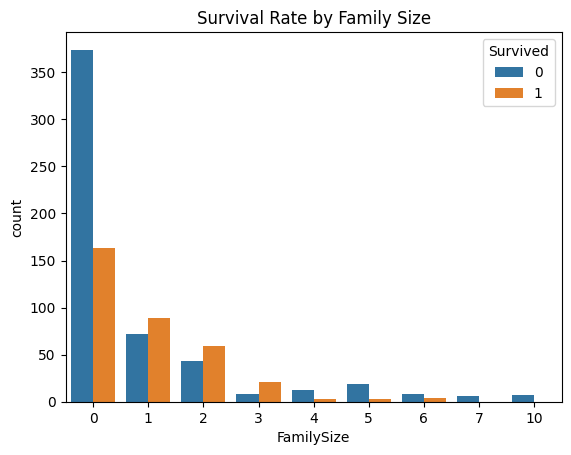

In [5]:
additional_notes = """
### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
"""

analysis = agent.run(
    """You are an expert data analyst.
Please load the source file and analyze its content.
According to the variables you have, begin by listing 3 interesting questions that could be asked on this data, for instance about specific correlations with survival rate.
Then answer these questions one by one, by finding the relevant numbers.
Meanwhile, plot some figures using matplotlib/seaborn and save them to the (already existing) folder './figures/': take care to clear each figure with plt.clf() before doing another plot.

In your final answer: summarize these correlations and trends
After each number derive real worlds insights, for instance: "Correlation between is_december and boredness is 1.3453, which suggest people are more bored in winter".
Your final answer should have at least 3 numbered and detailed parts.
""",
    additional_notes=additional_notes,
    source_file="titanic/train.csv",
)

In [6]:
print(analysis)

Here is the final answer:

**Interesting Questions**

1. Is there a correlation between socio-economic status (Pclass) and survival rate?
2. Is there a correlation between age and survival rate?
3. Is there a correlation between family size and survival rate?

**Answers to Questions**

1. Correlation between Pclass and survival rate: -0.338
Insight: Passengers from lower socio-economic backgrounds were less likely to survive.
2. Correlation between age and survival rate: -0.077
Insight: Older passengers were slightly less likely to survive.
3. Correlation between family size and survival rate: 0.017
Insight: Passengers traveling with larger families were slightly more likely to survive, but this correlation is very weak and may not be significant.

**Summary of Correlations and Trends**

The analysis of the Titanic dataset reveals several interesting trends and correlations. Firstly, the socio-economic status of passengers played a significant role in their survival, with passengers fr

Impressive, isn't it? You could also provide your agent with a visualizer tool to let it reflect upon its own graphs!

## Data scientist agent: run predictions

👉 Now let's dig further: **we will let our model perform predictions on the data.**

To do so, we also let it use `sklearn` in the `additional_authorized_imports`.

In [8]:
agent = ReactCodeAgent(
    tools=[],
    llm_engine=llm_engine,
    additional_authorized_imports=[
        "numpy",
        "pandas",
        "matplotlib.pyplot",
        "seaborn",
        "sklearn",
    ],
    max_iterations=12,
)

output = agent.run(
    """You are an expert machine learning engineer.
Please train a ML model on "titanic/train.csv" to predict the survival for rows of "titanic/test.csv".
Output the results under './output.csv'.
Take care to import functions and modules before using them!
""",
    additional_notes=additional_notes + "\n" + analysis,
)

======== New task ========
You are an expert machine learning engineer.
Please train a ML model on "titanic/train.csv" to predict the survival for rows of "titanic/test.csv".
Output the results under './output.csv'.
Take care to import functions and modules before using them!

You have been provided with these initial arguments: {'additional_notes': "\n### Variable Notes\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family relations in this way...\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\nSome children travelled only with a nanny, therefore parch=0 for them.\n\nHere is the final answer:\n\n**Interesting Questions**\n\n1. Is th

The test predictions that the agent output above, once submitted to Kaggle, score **0.78229**, which is #2824 out of 17,360, and better than what I had painfully achieved when first trying the challenge years ago.

Your result will vary, but anyway I find it very impressive to achieve this with an agent in a few seconds.

🚀 The above is just a naive attempt with agent data analyst: it can certainly be improved a lot to fit your use case better!